In [1]:
import numpy as np
import matplotlib.pyplot as plt
import util

In [2]:
train_path = "../data/ds4_train.csv"
valid_path = "../data/ds4_valid.csv"
test_path = "../data/ds4_test.csv"

In [25]:
class PoissonRegression:
    def __init__(self, train_path, valid_path):
        self.train_path = train_path
        self.valid_path = valid_path
        self.X_train, self.y_train = util.load_dataset(self.train_path, add_intercept=True)
        self.X_valid, self.y_valid = util.load_dataset(self.valid_path, add_intercept=True)

        _, n = self.X_train.shape
        self.theta = np.zeros(n)

    def plot(self, train, valid):
        if train:
            plt.plot(self.y_train, self.predict(self.X_train), "xb")
        if valid:
            plt.plot(self.y_valid, self.predict(self.X_valid), "xb")

    def predict(self, X):
        return np.exp(X.dot(self.theta))
    
    def fit(self, learning_rate, eps, max_iter):
        m, n = self.X_train.shape
        self.theta = np.zeros(n)

        for _ in range(max_iter):
            diff = (learning_rate/m)  * self.X_train.T.dot(self.y_train - self.predict(self.X_train))
            self.theta += diff

            if np.linalg.norm(diff, 1) < eps:
                break

    def mse(self, X, y):
        return np.linalg.norm(y - self.predict(X))

In [34]:
poisson_regressor = PoissonRegression(train_path, valid_path)
learning_rates = np.arange(5e-10, 2e-5, 1e-10)

for lr in learning_rates:
    poisson_regressor.fit(lr, 1e-5, int(1e6))
    print(f"MSE for learning rate: {lr}")
    print(poisson_regressor.mse(poisson_regressor.X_valid, poisson_regressor.y_valid))
    print()

MSE for learning rate: 5e-10
1225785.5087144913

MSE for learning rate: 6e-10
1024512.3931062517

MSE for learning rate: 7e-10
879785.1585433868

MSE for learning rate: 7.999999999999999e-10
770794.0224003934

MSE for learning rate: 8.999999999999999e-10
685802.3757970622

MSE for learning rate: 9.999999999999999e-10
617648.3891678064

MSE for learning rate: 1.1e-09
561788.812061367

MSE for learning rate: 1.1999999999999998e-09
515215.8681545395

MSE for learning rate: 1.2999999999999996e-09
475780.32604543975

MSE for learning rate: 1.3999999999999997e-09
441940.69167149847

MSE for learning rate: 1.4999999999999998e-09
412631.5281271663

MSE for learning rate: 1.5999999999999994e-09
386971.1287838981

MSE for learning rate: 1.6999999999999995e-09
364315.6176881479

MSE for learning rate: 1.7999999999999996e-09
344196.32964437036

MSE for learning rate: 1.8999999999999996e-09
326204.93378405285

MSE for learning rate: 1.9999999999999993e-09
310049.09041145694

MSE for learning rate: 

KeyboardInterrupt: 

30629.696986007264


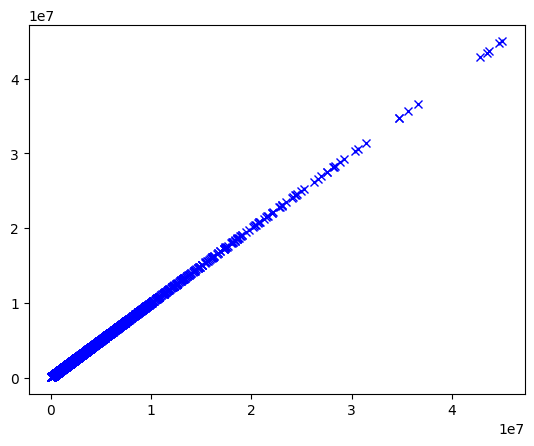

In [36]:
final_lr = 8.96e-8
final_pr = PoissonRegression(train_path, valid_path)
final_pr.fit(final_lr, 1e-6, int(1e6))
final_pr.plot(True, True)
print(final_pr.mse(final_pr.X_valid, final_pr.y_valid))